### CURRENT DIRECTORY

In [2]:
pwd

'C:\\Users\\Baron\\Desktop\\EE_258_Repo\\EE_258\\ML_PATH_EE258\\EE258_env\\projects'

### Pathing
    a. Baron's Pathing: 
        Main Location: 'C:\\Users\\Baron\\Desktop\\EE_258_Repo\\EE_258\\ML_PATH_EE258\\EE258_env\\projects'
        Dataset: C:\Users\Baron\Documents\Grad_School\EE_258\project
        
    b. Hunter's Pathing: 

### EE 258 Project Code

Table of Contents
    
    Part a) Preliminary Setup
    Part b) Dataset Description
    Part c) Dataset Visualization
    Part d) Pre Processing
    Part e) BASELINE MODEL: 
    Part f) MODELS UTILIZED: 
    Part g) MODEL IMPROVEMENTS
    Part h) PERFORMANCE & CONCLUSIONS: 
    Part e) 

### Part a) Preliminary Setup
    1. Import Necessary Libraries
    2. Import the Dataset

In [58]:
#1. Import Necessary Liobraries
import pandas as pd 
import numpy as np 
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

In [47]:
#2. Import the Dataset
##  Baron's Path
dataset_loc = r"C:\Users\Baron\Documents\Grad_School\EE_258\project\CUB_200_2011"

## Hunter's Path (Uncomment as needed)
#dataset_loc = r"Relace with path"


# Load key files
images_df = pd.read_csv(f"{dataset_loc}/images.txt", sep=" ", names=["image_id", "filepath"])
labels_df = pd.read_csv(f"{dataset_loc}/image_class_labels.txt", sep=" ", names=["image_id", "class_id"])
classes_df = pd.read_csv(f"{dataset_loc}/classes.txt", sep=" ", names=["class_id", "class_name"])
split_df = pd.read_csv(f"{dataset_loc}/train_test_split.txt", sep=" ", names=["image_id", "is_train"])


# Merge into a single DataFrame
birds_df = images_df.merge(labels_df, on="image_id")
birds_df = birds_df.merge(split_df, on="image_id")
birds_df = birds_df.merge(classes_df, on="class_id")

# Add full image path
birds_df["images_filepath"] = dataset_loc + "/images/" + birds_df["filepath"]


### Part b) Dataset Description

    1. General Info
    2. Describing the Dataset
    3. Head of the Dataset
    4. Describing the characteristicts of the images
    4. Creating General Dataframes (For later use)
    

In [51]:
# 1. General Info
birds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11788 entries, 0 to 11787
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   image_id         11788 non-null  int64 
 1   filepath         11788 non-null  object
 2   class_id         11788 non-null  int64 
 3   is_train         11788 non-null  int64 
 4   class_name       11788 non-null  object
 5   images_filepath  11788 non-null  object
dtypes: int64(3), object(3)
memory usage: 552.7+ KB


In [53]:
#2. Describing the dataset
birds_df.describe()

image_id      class_id      is_train
count  11788.000000  11788.000000  11788.000000
mean    5894.500000    101.126315      0.508483
std     3403.046821     57.476826      0.499949
min        1.000000      1.000000      0.000000
25%     2947.750000     51.000000      0.000000
50%     5894.500000    101.000000      1.000000
75%     8841.250000    151.000000      1.000000
max    11788.000000    200.000000      1.000000

In [63]:
#3. Head of the Dataset (Used to see a quick glimpse of the dataset)
birds_df.head(120)

image_id                                           filepath  class_id  \
0           1  001.Black_footed_Albatross/Black_Footed_Albatr...         1   
1           2  001.Black_footed_Albatross/Black_Footed_Albatr...         1   
2           3  001.Black_footed_Albatross/Black_Footed_Albatr...         1   
3           4  001.Black_footed_Albatross/Black_Footed_Albatr...         1   
4           5  001.Black_footed_Albatross/Black_Footed_Albatr...         1   
..        ...                                                ...       ...   
115       116  002.Laysan_Albatross/Laysan_Albatross_0083_756...         2   
116       117  002.Laysan_Albatross/Laysan_Albatross_0094_101...         2   
117       118  002.Laysan_Albatross/Laysan_Albatross_0103_504...         2   
118       119  002.Laysan_Albatross/Laysan_Albatross_0079_506...         2   
119       120  002.Laysan_Albatross/Laysan_Albatross_0051_102...         2   

     is_train                  class_name  \
0           0  001.Black_footed_Albatross   
1           1  001.Black_footed_Albatross   
2           0  001.Black_footed_Albatross   
3           1  001.Black_footed_Albatross   
4           1  001.Black_footed_Albatross   
..        ...                         ...   
115         1        002.Laysan_Albatross   
116         1        002.Laysan_Albatross   
117         0        002.Laysan_Albatross   
118         0        002.Laysan_Albatross   
119         1        002.Laysan_Albatross   

                                       images_filepath  
0    C:\Users\Baron\Documents\Grad_School\EE_258\pr...  
1    C:\Users\Baron\Documents\Grad_School\EE_258\pr...  
2    C:\Users\Baron\Documents\Grad_School\EE_258\pr...  
3    C:\Users\Baron\Documents\Grad_School\EE_258\pr...  
4    C:\Users\Baron\Documents\Grad_School\EE_258\pr...  
..                                                 ...  
115  C:\Users\Baron\Documents\Grad_School\EE_258\pr...  
116  C:\Users\Baron\Documents\Grad_School\EE_258\pr...  
117  C:\Users\Baron\Documents\Grad_School\EE_258\pr...  
118  C:\Users\Baron\Documents\Grad_School\EE_258\pr...  
119  C:\Users\Baron\Documents\Grad_School\EE_258\pr...  

[120 rows x 6 columns]

In [62]:
# Get the first 5 unique folder names from birds_df
first_five_folders = birds_df['filepath'].apply(lambda x: x.split('/')[0]).unique()[:5]

# Loop through the folders and count images
for folder in first_five_folders:
    folder_path = os.path.join(dataset_loc, 'images', folder)
    image_count = len([
        f for f in os.listdir(folder_path)
        if f.lower().endswith(('.jpg', '.jpeg', '.png'))
    ])
    print(f"The folder '{folder}' contains {image_count} images.")

The folder '001.Black_footed_Albatross' contains 60 images.
The folder '002.Laysan_Albatross' contains 60 images.
The folder '003.Sooty_Albatross' contains 58 images.
The folder '004.Groove_billed_Ani' contains 60 images.
The folder '005.Crested_Auklet' contains 44 images.


In [73]:
for i in range(5):
    image_path = birds_df['images_filepath'].iloc[i]
    if os.path.exists(image_path):
        with Image.open(image_path) as img:
            print(img.size)  # Only outputs (width, height)

(500, 335)
(500, 336)
(500, 347)
(415, 500)
(331, 380)


### Part C) Dataset Visualization

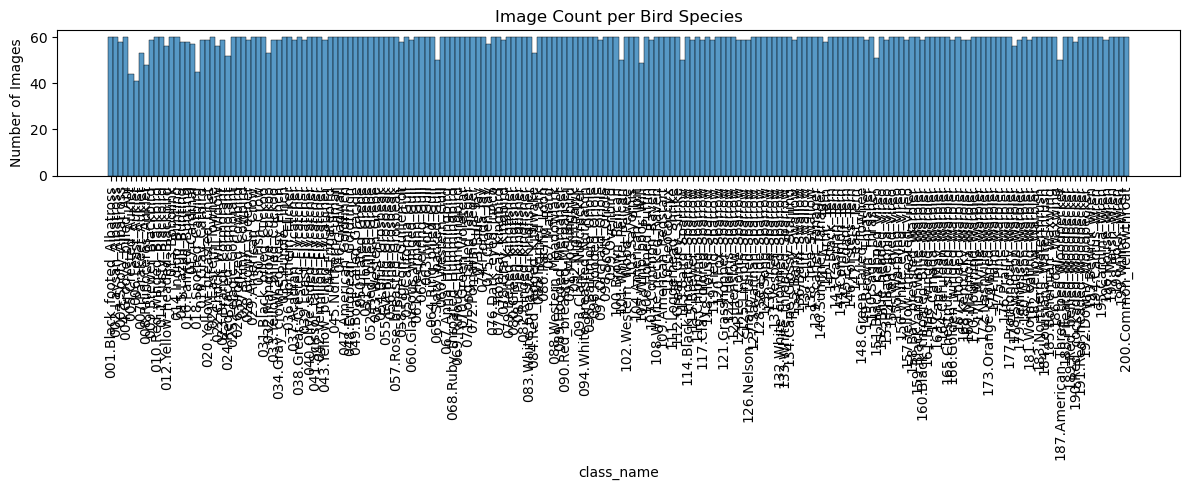

In [65]:
plt.figure(figsize=(12, 5))
sns.histplot(birds_df['class_name'], bins=50, kde=False)
plt.xticks(rotation=90)
plt.title("Image Count per Bird Species")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()

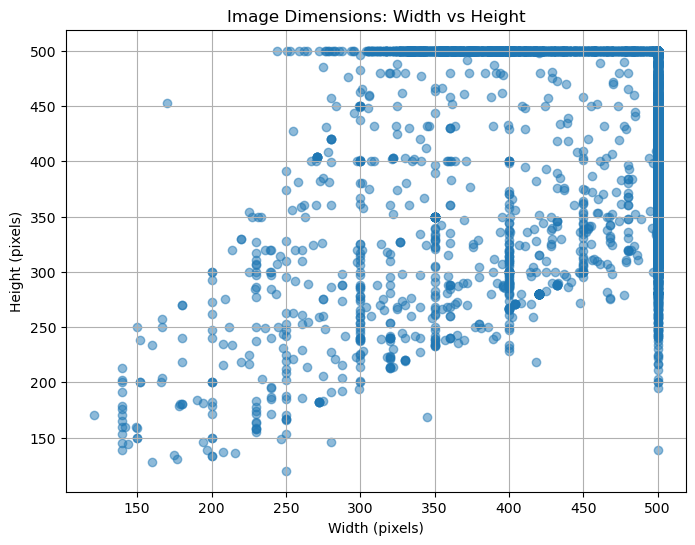

In [77]:
# Lists to hold width and height values
widths = []
heights = []

# Loop through all images
for path in birds_df["images_filepath"]:
    try:
        with Image.open(path) as img:
            width, height = img.size
            widths.append(width)
            heights.append(height)
    except Exception as e:
        print(f"Skipped {path}: {e}")

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(widths, heights, alpha=0.5)
plt.title("Image Dimensions: Width vs Height")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.grid(True)
plt.show()

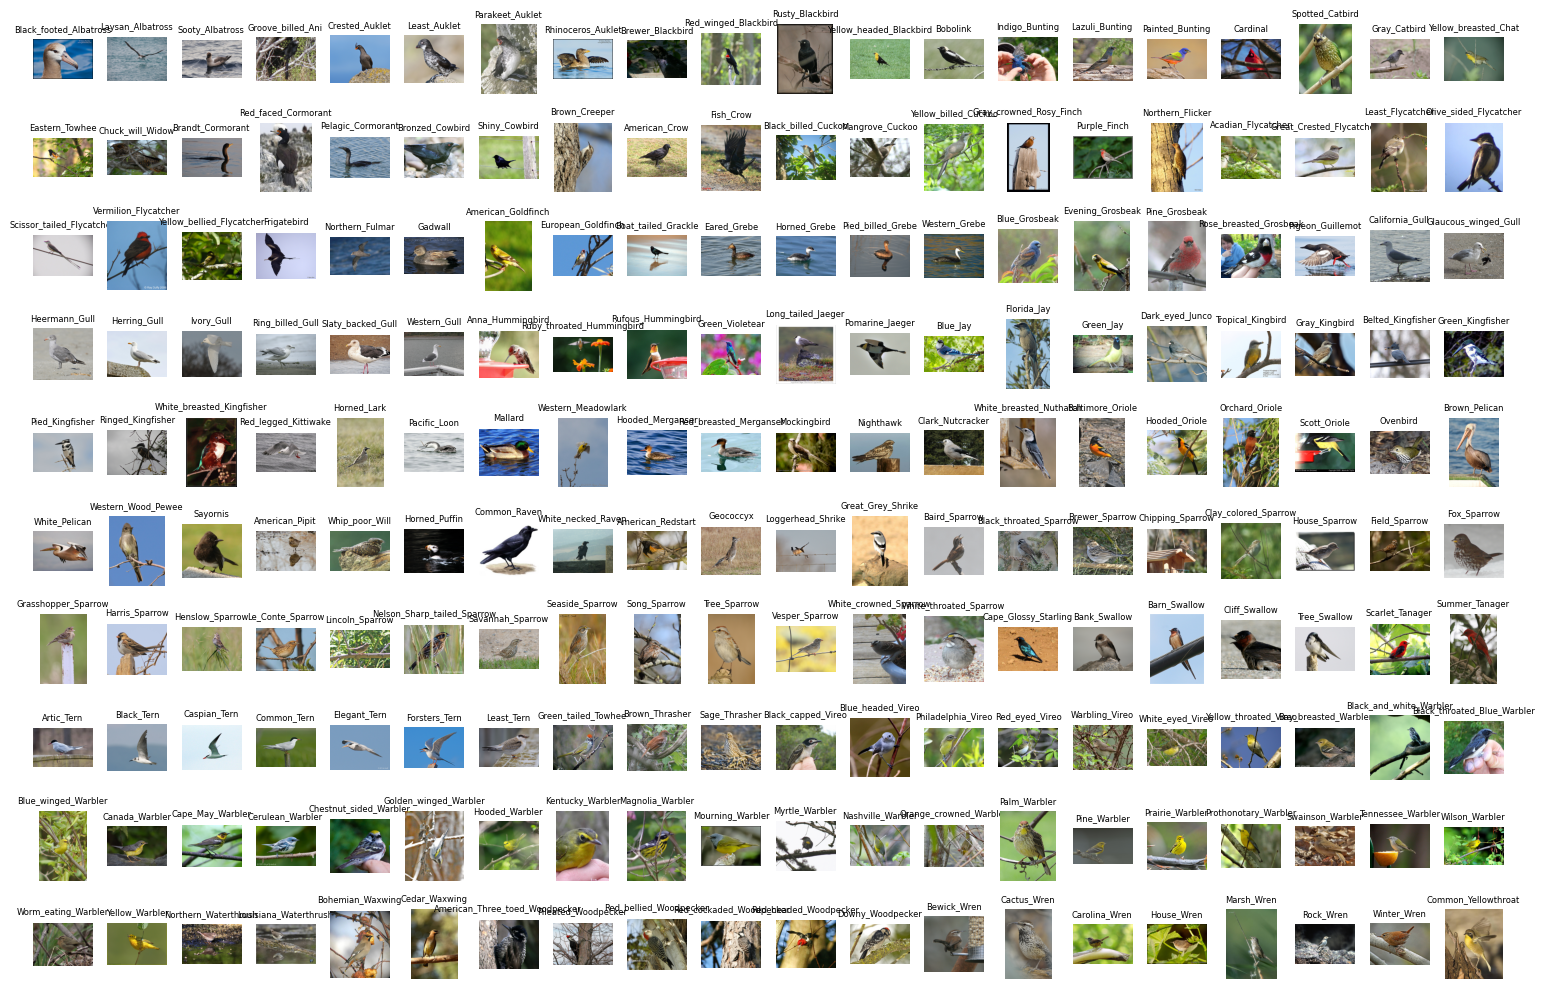

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Number of classes
NUM_CLASSES = birds_df['class_id'].nunique()

# Get one image per class
sample_df = birds_df.groupby('class_id').first().reset_index()

# Grid layout
cols = 20
rows = NUM_CLASSES // cols + int(NUM_CLASSES % cols > 0)
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
axes = axes.flatten()

for i, (_, row) in enumerate(sample_df.iterrows()):
    img = Image.open(row['images_filepath'])
    axes[i].imshow(img)
    axes[i].axis('off')
    # Shorten title by removing class ID prefix (e.g., "001.Red_winged_Blackbird" → "Red_winged_Blackbird")
    class_name = row['class_name'].split('.')[-1]
    axes[i].set_title(class_name, fontsize=6)

# Turn off unused axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [79]:
### Part D) Image Set Preprocessing

In [80]:
from PIL import Image
from tqdm import tqdm

# Original and new directories
original_dir = os.path.join(dataset_loc, 'images')
processed_dir = os.path.join(dataset_loc, 'images_p')

# Target size
target_size = (500, 375)

# Walk through all subfolders and images
for root, dirs, files in os.walk(original_dir):
    for file in tqdm(files, desc="Processing images"):
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            # Full path to original image
            img_path = os.path.join(root, file)

            # Create corresponding path in new directory
            relative_path = os.path.relpath(img_path, original_dir)
            new_path = os.path.join(processed_dir, relative_path)

            # Create subdirectory if it doesn't exist
            os.makedirs(os.path.dirname(new_path), exist_ok=True)

            try:
                # Open, resize, and save image
                img = Image.open(img_path).convert('RGB')
                img_resized = img.resize(target_size)
                img_resized.save(new_path)
            except Exception as e:
                print(f"Failed to process {img_path}: {e}")

Processing images: 0it [00:00, ?it/s]
Processing images: 100%|███████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 97.92it/s]
